In [ ]:
!pip install psycopg

import pandas as pd
import numpy as np
import psycopg
df=pd.read_csv('coin_Bitcoin.csv')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.1/178.1 kB 2.1 MB/s eta 0:00:00


In [ ]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
df.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11
2990,2991,Bitcoin,BTC,2021-07-06 23:59:59,35038.536363,33599.916169,33723.509655,34235.193451,2.650126e+10,6.418992e+11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [ ]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [ ]:
df.isnull().any()

SNo          False
Name         False
Symbol       False
Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Marketcap    False
dtype: bool

In [ ]:
df.isna().any()

SNo          False
Name         False
Symbol       False
Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Marketcap    False
dtype: bool

In [ ]:
df.nsmallest(5,'High')

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
69,70,Bitcoin,BTC,2013-07-07 23:59:59,74.561096,66.620003,68.749001,74.561096,0.0,8.488390e+08
68,69,Bitcoin,BTC,2013-07-06 23:59:59,75.000000,66.820000,68.504997,70.277298,0.0,7.997416e+08
71,72,Bitcoin,BTC,2013-07-09 23:59:59,78.300003,72.519997,76.000000,76.694000,0.0,8.738418e+08
67,68,Bitcoin,BTC,2013-07-05 23:59:59,80.000000,65.526001,79.989998,68.431000,0.0,7.784112e+08
70,71,Bitcoin,BTC,2013-07-08 23:59:59,80.000000,72.599998,76.500000,76.515999,0.0,8.714579e+08


In [ ]:
df.nlargest(10,'Low')

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2908,2909,Bitcoin,BTC,2021-04-15 23:59:59,63821.672193,62208.964366,63075.196221,63314.010845,6.095438e+10,1.182945e+12
2907,2908,Bitcoin,BTC,2021-04-14 23:59:59,64863.098908,61554.796690,63523.754869,63109.695935,7.745178e+10,1.179061e+12
2910,2911,Bitcoin,BTC,2021-04-17 23:59:59,62572.176051,60361.352179,61529.920997,60683.821233,6.613876e+10,1.133882e+12
2909,2910,Bitcoin,BTC,2021-04-16 23:59:59,63594.720913,60222.532079,63258.505174,61572.789601,8.429301e+10,1.150457e+12
2906,2907,Bitcoin,BTC,2021-04-13 23:59:59,63742.283337,59869.956293,59890.017790,63503.457930,6.998345e+10,1.186364e+12
2905,2906,Bitcoin,BTC,2021-04-12 23:59:59,61253.036916,59589.873756,60175.944757,59893.451889,5.182869e+10,1.118871e+12
2876,2877,Bitcoin,BTC,2021-03-14 23:59:59,61597.918396,59302.316977,61221.134297,59302.316977,4.390123e+10,1.106226e+12
2904,2905,Bitcoin,BTC,2021-04-11 23:59:59,60790.555315,59289.795631,59846.230786,60204.964914,4.628025e+10,1.124636e+12
2895,2896,Bitcoin,BTC,2021-04-02 23:59:59,60267.187650,58869.279968,59098.879070,59384.313359,5.872786e+10,1.108814e+12
2894,2895,Bitcoin,BTC,2021-04-01 23:59:59,59586.072249,58505.279054,58926.564147,59095.807978,6.166916e+10,1.103378e+12


In [ ]:
df.query('Open < Close').head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
5,6,Bitcoin,BTC,2013-05-04 23:59:59,115.000000,92.500000,98.099998,112.500000,0.0,1.250317e+09
6,7,Bitcoin,BTC,2013-05-05 23:59:59,118.800003,107.142998,112.900002,115.910004,0.0,1.288693e+09
9,10,Bitcoin,BTC,2013-05-08 23:59:59,115.779999,109.599998,109.599998,113.566002,0.0,1.264049e+09
11,12,Bitcoin,BTC,2013-05-10 23:59:59,122.000000,111.551003,112.799004,117.199997,0.0,1.305479e+09


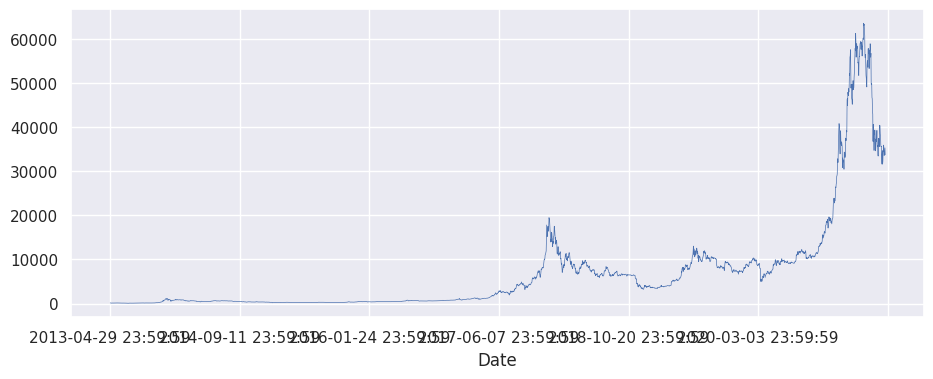

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11,4)})
df=df.set_index('Date')
df['Open'].plot(linewidth=0.5);

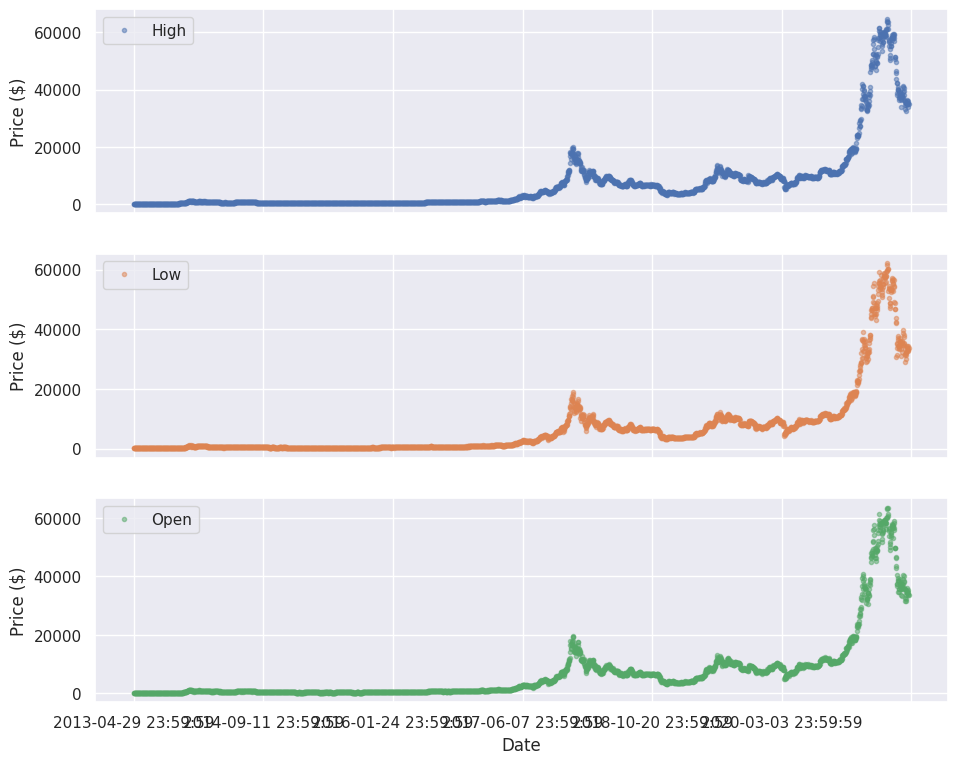

In [ ]:
cols_plot = ['High','Low','Open']
axes = df[cols_plot].plot(marker='.',alpha=0.5,linestyle='None',figsize=(11,9),subplots=True)
for ax in axes:
  ax.set_ylabel('Price ($)')

NameError: name 'df_weekly' is not defined

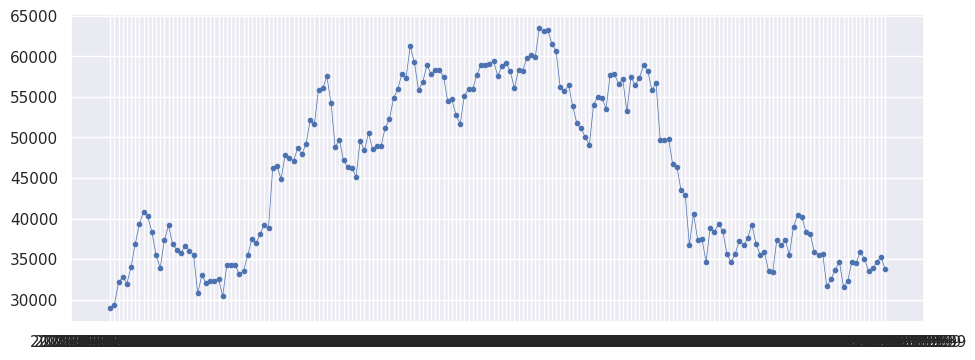

In [ ]:
fig,ax=plt.subplots()
ax.plot(df.loc['2021-01-01 23:59:59':,'Open'],marker='.',linestyle='-',linewidth=0.5,label='Daily')
ax.plot(df_weekly.loc['2021-01-01:','Open'],marker='0',markersize=8,linestyle='-',label='weekly Mean Resample')
ax.set_ylabel('Price ($)')
ax.legend();